# Learning Pandas by Working with Weather Data

## Introduction to Pandas

Pandas is a module in Python that is great for handling lots of data. We'll be relying on it today to help us sort, reshape, and clean up our data. 

> **From the Pandas documentation:**
>
> Here are just a few of the things that pandas does well:
>
> - Easy handling of **missing data** (represented as NaN) in floating point as well as non-floating point data
- Size mutability: columns can be **inserted and deleted** from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
- Powerful, flexible **group by** functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
- Make it **easy to convert** ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
- Intelligent **label-based slicing**, **fancy indexing**, and **subsetting** of large data sets
- Intuitive **merging** and **joining** data sets
- Flexible **reshaping** and **pivoting** of data sets
- **Hierarchical labeling** of axes (possible to have multiple labels per tick)
- **Robust IO tools** for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
- **Time series**-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

Let's get a sense of how it works with a test data set from a weather report.

In [6]:
import pandas as pd # the pd is by convention
import numpy as np # as is the np

import matplotlib.pyplot as plt
import seaborn as sns

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

The building blocks of pandas are called Series and DataFrames. A Dataframe is essentially a table, like shown below:

<img src='images/dataframe.png'>

Each row of the dataframe will be one specific record, and each column will be some aspect of that record. That will make more sense when we look at an example. Series are individual rows or columns (essentially if we break apart that dataframe into a single set of numbers). Let's look at that in action.

### Reading Data

To begin with, we're going to read in some data from a CSV.

In [7]:
weather = pd.read_csv('./data/weather.csv')
weather.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Here we got our table, and it shows us that we're looking at the hourly weather at some point. We can see that the temperature was below freezing for each of the first four hours, that there was some fog, and that it was a little bit windy. We used `weather.head()` to show us just the first few rows. Otherwise, it would show us a HUGE data amount. We can look at the last few rows with `weather.tail()`

In [8]:
weather.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,2012-12-31 23:00:00,0.0,-2.1,86,30,11.3,99.89,Snow


Now let's use a Pandas built-in function to learn a little about our data.

In [9]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
Date/Time             8784 non-null object
Temp (C)              8784 non-null float64
Dew Point Temp (C)    8784 non-null float64
Rel Hum (%)           8784 non-null int64
Wind Spd (km/h)       8784 non-null int64
Visibility (km)       8784 non-null float64
Stn Press (kPa)       8784 non-null float64
Weather               8784 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


We can also look to see how much of our data makes sense by asking it to look at the numeric columns and give us some stats about them.

In [10]:
weather.describe()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [11]:
weather.shape

(8784, 8)

Great, looks like these are all behaving relatively as expected! That's lovely. 

### Getting data from the dataframe

Now let's learn how to grab some data from the DataFrame. Also, let's look at what a Series is. To start with, let's grab a column from our data (note that the head says, "hey just show me the first few rows of my dataframe or column or whatever I'm asking you for)

In [12]:
weather['Temp (C)'].head()

0   -1.8
1   -1.8
2   -1.8
3   -1.5
4   -1.5
Name: Temp (C), dtype: float64

This is a series! It has both the index (the left side) and the value. So we know which row it is and what the value is. That's pretty sweet. What can we do with a series? One really handy thing is getting the number of times a value shows up. Let's see that in action.

In [13]:
weather['Weather'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

**Exercise 1:**

Using the dataframe, figure out what the most common Relative Humidity Percentage is

In [14]:
# Hint: Value Counts
weather['Rel Hum (%)'].value_counts()
#This is its own series, the numbers on the left become the index

68     210
83     202
81     195
71     194
64     192
59     192
82     185
63     184
65     184
70     181
67     181
66     178
61     177
69     176
76     172
73     171
80     170
79     169
72     169
84     168
62     166
88     165
77     165
58     164
86     161
57     160
75     156
60     155
85     154
54     152
      ... 
94      66
43      63
40      63
96      59
95      59
38      56
39      53
34      52
37      51
36      50
35      47
99      44
33      42
98      35
31      29
29      26
30      26
32      25
27      24
28      22
26      18
24      13
100     10
21       9
25       9
22       6
23       5
20       5
18       2
19       1
Name: Rel Hum (%), Length: 83, dtype: int64

### Row Lookups

Cool. Now how do we access rows? We have to play a little bit of pandas games to do so. We'll use `.iloc` to do the job. Let's demonstrate by grabbing the first (0th) row.

In [15]:
weather.iloc[0]

Date/Time             2012-01-01 00:00:00
Temp (C)                             -1.8
Dew Point Temp (C)                   -3.9
Rel Hum (%)                            86
Wind Spd (km/h)                         4
Visibility (km)                         8
Stn Press (kPa)                    101.24
Weather                               Fog
Name: 0, dtype: object

We can get multiple rows by following Python's conventions like so:

In [16]:
weather.iloc[10:13]

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
10,2012-01-01 10:00:00,-1.0,-2.3,91,9,1.2,101.15,Fog
11,2012-01-01 11:00:00,-0.5,-2.1,89,7,4.0,100.98,Fog
12,2012-01-01 12:00:00,-0.2,-2.0,88,9,4.8,100.79,Fog


We also might want to select multiple columns. We can do that like this:

In [17]:
weather[['Temp (C)',"Dew Point Temp (C)"]].head()

,Temp (C),Dew Point Temp (C)
0,-1.8,-3.9
1,-1.8,-3.7
2,-1.8,-3.4
3,-1.5,-3.2
4,-1.5,-3.3


And what if we want to get rows and columns?

In [18]:
weather.loc[3:8, ['Temp (C)',"Dew Point Temp (C)"]]
#use LOC because the columns are being named

,Temp (C),Dew Point Temp (C)
3,-1.5,-3.2
4,-1.5,-3.3
5,-1.4,-3.3
6,-1.5,-3.1
7,-1.4,-3.6
8,-1.4,-3.6


**Note that iloc and loc have slightly different outputs, we're not going to have time to fully explore the difference... just remember that they're slightly different! iloc means "index location" and loc means "label location"**.

In [19]:
weather.iloc[3:6]

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog


In [20]:
weather.loc[3:6]

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog


### Filtering

What if we want to filter the data so we only see rows that match a certain criteria. We can do that by making a mask. A mask is a series that is trues and falses, based on some condition. So let's ask it to check if the temperature was -1.8, and if so mark the row as a true and if not, mark it as a false.

In [21]:
mask = (weather['Temp (C)'] == -1.8) 
mask.head()

0     True
1     True
2     True
3    False
4    False
Name: Temp (C), dtype: bool

In [22]:
weather['Temp (C)'].head()

0   -1.8
1   -1.8
2   -1.8
3   -1.5
4   -1.5
Name: Temp (C), dtype: float64

Now we apply the mask and should see that only rows with that temperature remain!

In [23]:
weather_test = weather[mask] 
weather_test.head(10)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
164,2012-01-07 20:00:00,-1.8,-3.7,87,4,9.7,100.48,Snow
682,2012-01-29 10:00:00,-1.8,-8.3,61,24,24.1,100.87,Mostly Cloudy
927,2012-02-08 15:00:00,-1.8,-12.8,43,32,48.3,101.45,Mainly Clear
1081,2012-02-15 01:00:00,-1.8,-5.2,78,4,25.0,101.31,Cloudy
1216,2012-02-20 16:00:00,-1.8,-8.5,60,20,48.3,102.06,Mainly Clear
1298,2012-02-24 02:00:00,-1.8,-5.4,76,0,25.0,100.20,Clear
1328,2012-02-25 08:00:00,-1.8,-3.2,90,32,1.2,98.20,"Snow,Blowing Snow"


What if we want to match multiple conditions? Let's do a double filter

In [24]:
mask = (weather['Temp (C)'] == -1.8) & (weather['Visibility (km)'] == 8.0)
weather[mask]

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
7778,2012-11-20 02:00:00,-1.8,-3.5,88,6,8.0,102.08,Fog


In [25]:
mask.value_counts()

False    8781
True        3
dtype: int64

**Exercise 2:**

Apply a new filter to select only the days where the temperature is above 25C and the humidity is at or above 80%. How many hours are like this?

In [26]:
# Hint: create a filter called mask, then apply it to the dataframe
mask = (weather['Temp (C)'] > 25) & (weather['Rel Hum (%)'] >= 80)
weather[mask]

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
4766,2012-07-17 14:00:00,25.5,23.1,87,17,6.4,99.65,"Thunderstorms,Rain Showers"
4767,2012-07-17 15:00:00,25.8,22.0,80,4,24.1,99.69,Cloudy
4769,2012-07-17 17:00:00,25.9,22.2,80,7,24.1,99.83,Cloudy
5221,2012-08-05 13:00:00,25.2,23.0,88,24,12.9,100.40,Rain Showers


### Doing Stats with Pandas

Pandas also let's us do some neat things like measuring some statistics about our data. Let's take a look at the average temperature throughout the year of data.

In [27]:
weather['Temp (C)'].mean()

8.79814435336981

Or we could find the max or min temperature

In [28]:
weather['Temp (C)'].max()

33.0

In [29]:
weather['Temp (C)'].min()

-23.3

**Exercise 3:**

Let's combine filtering and stats. Find the average wind speed on days that are less than 10C.

In [30]:
# Hint: Create the filter, apply it to the frame, then calculate something on the new dataframe
mask = (weather['Temp (C)'] < 10)
weather2 = weather[mask]
weather2['Wind Spd (km/h)'].mean()

15.734191258043044

### Making new columns

Pandas also allows us to create columns that are mixtures of other columns. Let's make a column that is "visibility as a percentage of the maximum visibility".

In [31]:
max_vis = weather['Visibility (km)'].max()
weather['percent_visibility'] = weather['Visibility (km)']/max_vis
weather.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,percent_visibility
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0.165631
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,0.165631
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",0.082816
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",0.082816
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,0.099379


**Exercise 4**

Let's convert temperature to Farenheit and create a new column to store that. The conversion to degrees F is done by multiplying the temperature in C by 1.8, then adding 32. Store this in a column called `Temp (F)`. If you've done it right, the first conversion should go from `-1.8C` to `28.76F` in a new column.

In [32]:
# Hint: You can multiply a column by a number, and add numbers to it
weather['Temp (F)'] = weather['Temp (C)']*1.8+32
weather

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,percent_visibility,Temp (F)
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0.165631,28.76
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,0.165631,28.76
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",0.082816,28.76
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",0.082816,29.30
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,0.099379,29.30
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog,0.132505,29.48
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog,0.132505,29.30
7,2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog,0.165631,29.48
8,2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog,0.165631,29.48
9,2012-01-01 09:00:00,-1.3,-3.1,88,15,4.0,101.20,Fog,0.082816,29.66


### Plotting with Pandas

The last part of pandas we want to explore today is some of it's built in plotting features. Let's plot a histogram of temperature over the year.

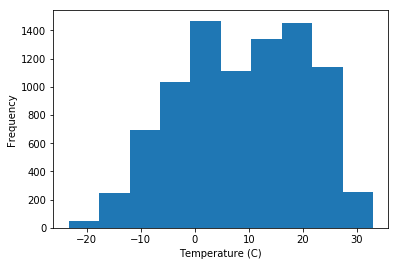

In [33]:
weather['Temp (C)'].plot.hist()
plt.xlabel("Temperature (C)");

What about weather over time? Let's do a line plot of the temperature.

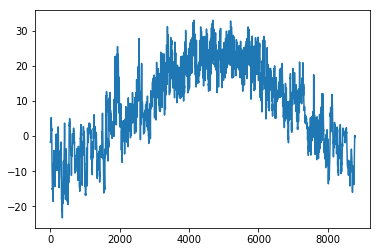

In [34]:
weather['Temp (C)'].plot.line()

Neat! Except, that doesn't show us the date on the X-Axis. That's because right now, we don't have the date as the index. Let's try to fix that.

In [35]:
weather['Date/Time'] = pd.to_datetime(weather['Date/Time'])
weather = weather.set_index('Date/Time')

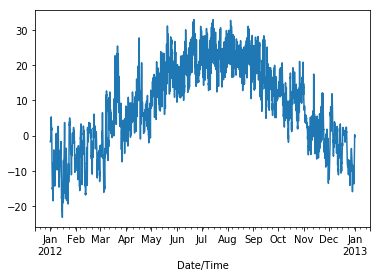

In [36]:
weather['Temp (C)'].plot.line()

**Exercise 5**

Plot a histogram of wind speeds. Also plot the wind speed versus the time.

In [37]:
# Hint: plot.hist(), plot.line()

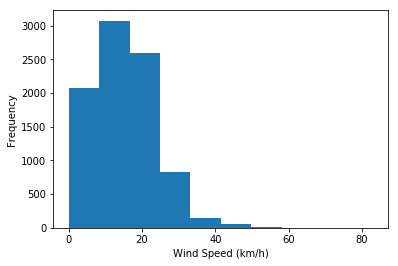

In [38]:
weather['Wind Spd (km/h)'].plot.hist()
plt.xlabel("Wind Speed (km/h)");

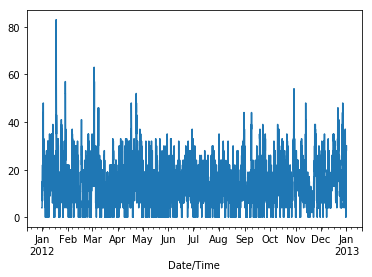

In [39]:
weather['Wind Spd (km/h)'].plot.line()

## Exercises

In the data folder, there is a csv that contains the file `auto-mpg.csv`. That data is from here: https://archive.ics.uci.edu/ml/datasets/auto+mpg

This contains information about makes/models of cars and their reported fuel efficiency. We'll use that as a baseline for some hands on work with Pandas.

### Challenge 1: Load the file into a Pandas dataframe, then print the top 5 rows

Store this dataframe in a variable called `autos`

In [40]:
autos = pd.read_csv('./data/auto-mpg.csv')
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,"chevrolet,chevelle,malibu"
1,15.0,8,350.0,165.0,3693,11.5,70,1,"buick,skylark,320"
2,18.0,8,318.0,150.0,3436,11.0,70,1,"plymouth,satellite"
3,16.0,8,304.0,150.0,3433,12.0,70,1,"amc,rebel,sst"
4,17.0,8,302.0,140.0,3449,10.5,70,1,"ford,torino"


In [41]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
car_name        392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 27.6+ KB


In [42]:
autos.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Challenge 2: Find the mean weight and the mean mpg in the dataset as a whole. Now find those for all vehicles with model_year equal to 77

In [43]:
autos['mpg'].mean()

23.44591836734694

In [44]:
autos['weight'].mean()

2977.5841836734694

In [45]:
mask = (autos['model_year'] == 77) 
autos[mask]
autos2 = autos[mask]
autos2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
214,31.5,4,98.0,68.0,2045,18.5,77,3,"honda,accord,cvcc"
215,30.0,4,111.0,80.0,2155,14.8,77,1,"buick,opel,isuzu,deluxe"
216,36.0,4,79.0,58.0,1825,18.6,77,2,"renault,5,gtl"
217,25.5,4,122.0,96.0,2300,15.5,77,1,"plymouth,arrow,gs"
218,33.5,4,85.0,70.0,1945,16.8,77,3,"datsun,f-10,hatchback"
219,17.5,8,305.0,145.0,3880,12.5,77,1,"chevrolet,caprice,classic"
220,17.0,8,260.0,110.0,4060,19.0,77,1,"oldsmobile,cutlass,supreme"
221,15.5,8,318.0,145.0,4140,13.7,77,1,"dodge,monaco,brougham"
222,15.0,8,302.0,130.0,4295,14.9,77,1,"mercury,cougar,brougham"
223,17.5,6,250.0,110.0,3520,16.4,77,1,"chevrolet,concours"


In [46]:
autos2[['mpg','weight']].mean()

mpg         23.375000
weight    2997.357143
dtype: float64

In [47]:
autos2['weight'].mean()

2997.3571428571427

### Challenge 3: Create a column that is horsepower per cylinder

In [48]:
autos['hp_per_cylinder'] = autos['horsepower']/autos['cylinders']
autos

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,hp_per_cylinder
0,18.0,8,307.0,130.0,3504,12.0,70,1,"chevrolet,chevelle,malibu",16.250000
1,15.0,8,350.0,165.0,3693,11.5,70,1,"buick,skylark,320",20.625000
2,18.0,8,318.0,150.0,3436,11.0,70,1,"plymouth,satellite",18.750000
3,16.0,8,304.0,150.0,3433,12.0,70,1,"amc,rebel,sst",18.750000
4,17.0,8,302.0,140.0,3449,10.5,70,1,"ford,torino",17.500000
5,15.0,8,429.0,198.0,4341,10.0,70,1,"ford,galaxie,500",24.750000
6,14.0,8,454.0,220.0,4354,9.0,70,1,"chevrolet,impala",27.500000
7,14.0,8,440.0,215.0,4312,8.5,70,1,"plymouth,fury,iii",26.875000
8,14.0,8,455.0,225.0,4425,10.0,70,1,"pontiac,catalina",28.125000
9,15.0,8,390.0,190.0,3850,8.5,70,1,"amc,ambassador,dpl",23.750000


### Challenge 4: Make two histograms, one of hp_per_cylinder and one of horsepower. 

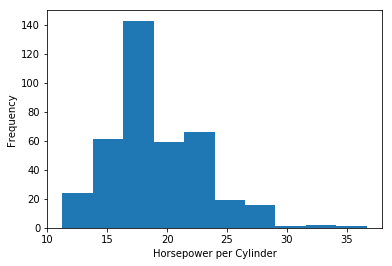

In [49]:
autos['hp_per_cylinder'].plot.hist()
plt.xlabel("Horsepower per Cylinder");

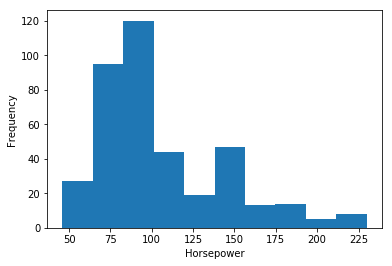

In [50]:
autos['horsepower'].plot.hist()
plt.xlabel("Horsepower");